Classification Report:
              precision    recall  f1-score   support

         INO       1.00      1.00      1.00       200
      Normal       1.00      1.00      1.00       200
   Nystagmus       1.00      1.00      1.00       200
         PSP       0.50      0.47      0.48       200
 Parkinson's       0.50      0.54      0.52       200

    accuracy                           0.80      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.80      0.80      0.80      1000


Confusion Matrix Explanation:
Each row represents the actual condition (true labels), while each column represents the predicted condition (predicted labels).
For example:
- Row 1 (Actual: INO):
  - True Positives (Correctly predicted as INO): 200
  - False Negatives (Actual INO predicted as other classes): 0
- Column 1 (Predicted as INO):
  - False Positives (Other classes incorrectly predicted as INO): 0

- Row 2 (Actual: Normal):
  - True Positives (Correctly predicted as Normal)

/var/folders/lr/0f2rdxbd1dx8g_c_z8jq5gw00000gn/T/ipykernel_9330/3628559235.py:42: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  disp.figure_.show()


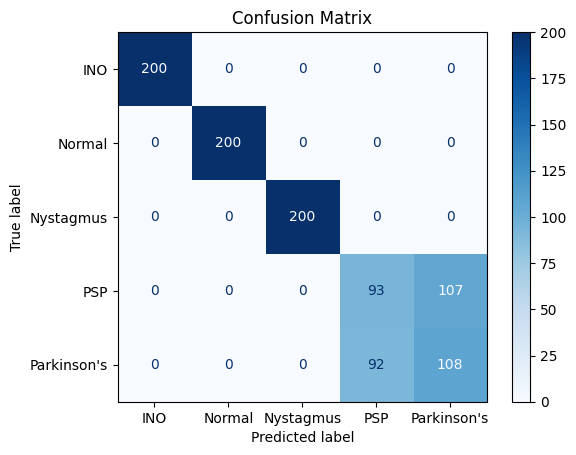

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import joblib

# Load the training dataset
train_data = pd.read_csv('training_dataset.csv')  # Replace with your actual dataset path

# Extract features (Up Count, Down Count, Right Count, Left Count, Blink Count) and target (Condition)
X = train_data[['Up Count', 'Down Count', 'Right Count', 'Left Count', 'Blink Count']]
y = train_data['Condition']

# Encode the labels (diseases) into numeric format
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Initialize the SVM model
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=1))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
disp.ax_.set_title("Confusion Matrix")
disp.figure_.show()

# Explanation of confusion matrix elements
print("\nConfusion Matrix Explanation:")
print("Each row represents the actual condition (true labels), while each column represents the predicted condition (predicted labels).")
print("For example:")
for i, class_name in enumerate(label_encoder.classes_):
    print(f"- Row {i+1} (Actual: {class_name}):")
    print(f"  - True Positives (Correctly predicted as {class_name}): {conf_matrix[i, i]}")
    print(f"  - False Negatives (Actual {class_name} predicted as other classes): {sum(conf_matrix[i]) - conf_matrix[i, i]}")
    print(f"- Column {i+1} (Predicted as {class_name}):")
    print(f"  - False Positives (Other classes incorrectly predicted as {class_name}): {sum(conf_matrix[:, i]) - conf_matrix[i, i]}\n")

# Save the trained model for future use
joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

print("Model and Label Encoder saved successfully.")

In [9]:
import pandas as pd
import joblib

# Load the trained SVM model and label encoder
svm_model = joblib.load('svm_model.pkl')
label_encoder = joblib.load('labl_encoder.pkl')

# Load the new dataset (for prediction) - each row is for 10 seconds of data
test_data = pd.read_csv('serial_output.csv')  # Replace with your actual new dataset path

# Accumulate 360 rows (1 hour data) into hourly data
X_new = test_data[['Up Count', 'Down Count', 'Right Count', 'Left Count', 'Blink Count']].groupby(test_data.index // 360).sum()

# Predict on the new dataset (hourly accumulated data)
y_pred_new = svm_model.predict(X_new)

# Decode the predictions back to disease labels
predicted_diseases = label_encoder.inverse_transform(y_pred_new)

# Output the predictions
for i, disease in enumerate(predicted_diseases):
    print(f"Hour {i + 1} predicted disease: {disease}")

Hour 1 predicted disease: Normal
